2006 is red line
2010 is blue line
2018 is green line


/l/python3.4.3/lib/python3.4/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


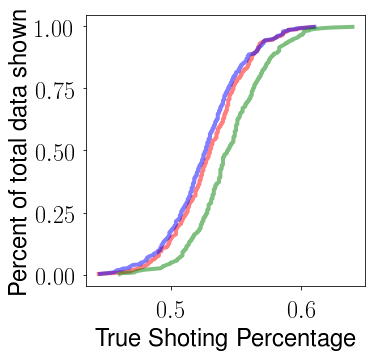

2006 alpha :  15.888661709019033
2006 beta :  0.4975888330892463
2006 correlation coefficient :  0.7956030247487199
2010 alpha :  17.287799449926677
2010 beta :  0.5007222952209333
2010 correlation coefficient :  0.7930624777000929
2018 alpha :  17.354337924294008
2018 beta :  0.4848153945806514
2018 correlation coefficient :  0.7870174838557115


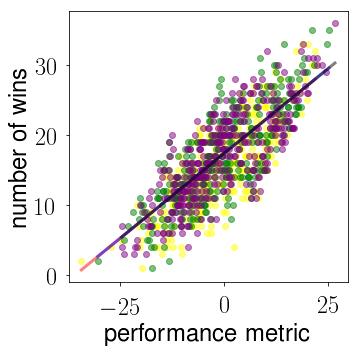

In [1]:
from bs4 import BeautifulSoup
import requests

# import statements
%matplotlib inline 
import matplotlib.pyplot as plt 
# Import matplotlib for graphs and visualizations
# lets you plot inside the notebook
import networkx as nx # analysis for networks
import pandas as pd # analysis for csv type data
import numpy as np # analysis for matrices and vectors
import pickle # convenient way to save data
import random

base_url = 'https://www.sports-reference.com'

# Function to
def fetch_url(url):
    # Fetch a url and return it contents as a string"""

    uf = requests.get(url)
    return (uf.text)

# Function to
def scrape_data(yr):
    
    # get input year and get the data from sepcific page
    url_content = fetch_url('%s/cbb/seasons/%s-advanced-school-stats.html' % (base_url, yr))
    soup = BeautifulSoup(url_content, "lxml")

    # get the table
    rows = soup.find_all('tr')

    # a list to store histogram. Ex. hist[1] = [['akron', '.639','17.5' ]]
    data = []
    for row in rows:
        
        columns = row.find_all('td')
        if len(columns) > 4:
            metrics = [(columns[0].get_text().rstrip('\xa0NCAA')), (columns[1].get_text()), (columns[2].get_text()), (columns[4].get_text()),
                        (columns[5].get_text()),(columns[20].get_text())]
            data.append(metrics)
    #print(data)
    return data
    

#add more year to list  to show more        
years = ['2006', '2010','2018']
data = {}

for yr in years:
    data[yr] = scrape_data(yr)
 
    
##compute cumulative distribution
def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        #print(n)
        norm = norm + 1.0
        x.append(n)
        cx.append(norm/float(len(sorted_data)+1.0))
    return x, cx

#2013
##generate data for experiments
outcomes = []
outcomes2 = []
outcomes3 = []

for entry in data['2006']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[5])
        outcomes.append(r)


    
x, cx = cumulative_from_data (outcomes)

for entry in data['2010']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[5])
        outcomes2.append(r)


    
x1, cx1 = cumulative_from_data (outcomes2)

for entry in data['2018']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[5])
        outcomes3.append(r)


    
x2, cx2 = cumulative_from_data (outcomes3)
##


##
plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.xlabel('True Shoting Percentage')
plt.ylabel('Percent of total data shown')
print ('2006 is red line')
print ('2010 is blue line')
print ('2018 is green line')
plt.plot(x, cx, color = 'red', linewidth=4.0, alpha=0.5)
plt.plot(x1, cx1, color = 'blue', linewidth=4.0, alpha=0.5)
plt.plot(x2, cx2, color = 'green', linewidth=4.0, alpha=0.5)
plt.show()




import numpy as np
from scipy import stats

#2013
##generate data for experiments
x = []
y = []
x1 = []
y1 = []
x2 = []
y2 = []

for entry in data['2006']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[2])
        y.append(r)
        r = float(entry[4])
        x.append(r)
       
for entry in data['2010']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[2])
        y1.append(r)
        r = float(entry[4])
        x1.append(r)
       
for entry in data['2018']:
    #print (entry)
    if len(entry)> 3:
        r = float(entry[2])
        y2.append(r)
        r = float(entry[4])
        x2.append(r)
      
    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ('2006 alpha : ', intercept)
print ('2006 beta : ', slope)
print ('2006 correlation coefficient : ', r_value)

slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
print ('2010 alpha : ', intercept)
print ('2010 beta : ', slope)
print ('2010 correlation coefficient : ', r_value)

slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
print ('2018 alpha : ', intercept)
print ('2018 beta : ', slope)
print ('2018 correlation coefficient : ', r_value)


##visualize histogram

plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.ylabel('number of wins')
plt.xlabel('performance metric')
plt.plot(x, y, marker = 'o', color = 'yellow', linewidth=0.0, alpha=0.5)
plt.plot(x1, y1, marker = 'o', color = 'green', linewidth=0.0, alpha=0.5)
plt.plot(x2, y2, marker = 'o', color = 'purple', linewidth=0.0, alpha=0.5)
best_fit_x = np.arange(min(x), max(x), (max(x)- min(x)) / 10000.0)
best_fit_y = intercept + slope * best_fit_x
best_fit_x1 = np.arange(min(x1), max(x1), (max(x1)- min(x1)) / 10000.0)
best_fit_y1 = intercept + slope * best_fit_x1
best_fit_x2 = np.arange(min(x2), max(x2), (max(x2)- min(x2)) / 10000.0)
best_fit_y2 = intercept + slope * best_fit_x2
plt.plot(best_fit_x, best_fit_y, color ='red', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
plt.plot(best_fit_x1, best_fit_y1, color ='blue', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
plt.plot(best_fit_x2, best_fit_y2, color ='black', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
plt.show()
#2014

##generate data for experiments



    
    





